URL: https://www.youtube.com/watch?v=KEYgPOcqmsw

In [1]:
! wget https://raw.githubusercontent.com/badriadhikari/Artificial-Intelligence/master/data/pima-diabetes.csv

--2021-05-22 01:04:52--  https://raw.githubusercontent.com/badriadhikari/Artificial-Intelligence/master/data/pima-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘pima-diabetes.csv’

pima-diabetes.csv   100%[===================>]  23.31K  --.-KB/s    in 0.001s  

2021-05-22 01:04:53 (17.7 MB/s) - ‘pima-diabetes.csv’ saved [23873/23873]



In [2]:
import pandas as pd

df = pd.read_csv('pima-diabetes.csv', delimiter=',')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Outcome'].unique()

array([1, 0])

In [4]:
import numpy as np

dataset = np.genfromtxt('pima-diabetes.csv', delimiter=',', skip_header=True)
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
dataset.shape

(768, 9)

In [6]:
dataset[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01, 1.000e+00],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01, 0.000e+00],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01, 1.000e+00],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01, 0.000e+00],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01, 1.000e+00]])

In [7]:
np.set_printoptions(formatter={'float': '{:0.1f}'.format})
dataset[:5]

array([[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.6, 50.0, 1.0],
       [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.4, 31.0, 0.0],
       [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.7, 32.0, 1.0],
       [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.2, 21.0, 0.0],
       [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.3, 33.0, 1.0]])

In [8]:
x = dataset[:,:-1]

In [9]:
y = dataset[:,-1]

In [10]:
print(x.shape, y.shape)

(768, 8) (768,)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense (1, input_dim = 8, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'] )

In [ ]:
model.fit(x, y, epochs = 435, verbose = 0)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [14]:
print(y[:10])

[1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0]


In [26]:
predictions = model.predict(x)
print(predictions[:10].T)

[[0.6 0.2 0.8 0.2 0.8 0.3 0.2 0.8 0.7 0.2]]


In [16]:
result = model.predict([[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.6, 50.0]])
result

array([[0.6]], dtype=float32)

In [17]:
print(y[5:10])

[0.0 1.0 0.0 1.0 1.0]


# Confusion Matix

In [18]:
rounded_predictions = []
for i in predictions:
  if (i > 0.5):
    rounded_predictions.append(1)
  else:
    rounded_predictions.append(0)

In [19]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [20]:
cm = confusion_matrix(y_true=y[:], y_pred=rounded_predictions)

In [21]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
cm_plot_labels = ['don`t_have_Diabetes','has_Diabetes']

Confusion matrix, without normalization
[[425  75]
 [121 147]]


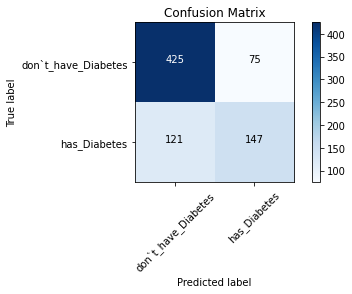

In [23]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [24]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model_logistic_regression.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpv1xtbage/assets
